In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#a = pd.read_csv("Train.csv")
#b = pd.read_csv("Linear_Y_Train.csv")
dfx = pd.read_csv("Train.csv", usecols = ['feature_1','feature_2','feature_3','feature_4','feature_5'])
dfy = pd.read_csv("Train.csv",usecols = ['target'])
print(dfx.shape)
print(dfy.shape)
#print(b.shape)

(1600, 5)
(1600, 1)


In [54]:
X = dfx.values
Y = dfy.values
X = (X - X.mean())/X.std()
Y = Y
#plt.scatter(X,Y)
#print(X[0][1])

In [55]:
def hypothesis(X,theta):
    p=0
    for i in range(X.shape[0]):
        p += theta[i]*X[i]
    return p

def error(X,Y,theta):
    error = 0
    n = X.shape[1]
    m = X.shape[0]
    for i in range(n):
        for j in range(m):
            hx = hypothesis(X[j],theta)
        error += (hx - Y[j])**2
    return error

def gradient(X,Y,theta):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n,))
   
    for j in range(n):
        for i in range(m):
            hx = hypothesis(X[i],theta)
            grad[j] += ( hx - Y[i][0])*X[i][j]
        
    return grad


def gradientdescent(X,Y,learning_rate = 0.001):
    n = X.shape[1]
    theta = np.zeros((n,))
    #gradient = np.zeroes((2,))
    
    itr = 0
    max_itr = 100
    error_list = []
   
    while(itr <= max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        itr += 1
        
    return theta,error_list


In [56]:
final_theta,error_list = gradientdescent(X,Y)

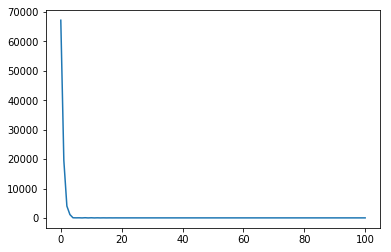

In [57]:
plt.plot(error_list)

In [45]:
print(final_theta)

[29.87729791 93.15160351  8.29174446 44.97966243  2.57995954]


In [71]:
 #plot the line for testing data
xtest = pd.read_csv("Test.csv")
print(xtest.shape)
xtest = xtest.values

(400, 5)


In [80]:

m = xtest.shape[0]
n = xtest.shape[1]
#for j in range(n):
for i in range(m):
    lx = hypothesis(xtest[i],final_theta)
    y_pred.append(lx)
#print(lx.shape)

In [89]:
y_predm = np.array(y_pred)
print(y_predm.shape)

(400,)


In [90]:
ID = [ix for ix in range(0,400)]
submiss = pd.DataFrame({"Id" : ID ,"target" : y_predm})
submiss.to_csv("sample_submission.csv",index = False)
submiss.head()

,Id,target
0,0,110.231623
1,1,113.549427
2,2,-26.831317
3,3,-49.349833
4,4,-101.464753
